<a href="https://colab.research.google.com/github/ulubeykhuja/mohir_dev_lessons/blob/main/MLga_tayyorlash_uzim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import sklearn

In [5]:
URL = "https://raw.githubusercontent.com/ageron/handson-ml2/refs/heads/master/datasets/housing/housing.csv"
df = pd.read_csv(URL)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [7]:
housing = train_set.drop('median_house_value', axis=1) # bashorat qilinadigan ustunni tashlash
housing_labels = train_set['median_house_value'].copy() # uni alohida saqlash

## Bo'sh qiymatlarni tashlash

In [8]:
# 1-usul: Bo'sh qiymatlarni tashlash
housing.dropna(subset=['total_bedrooms'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,INLAND
...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,<1H OCEAN


In [9]:
# 2-usul: Ustunni tashlash
housing.drop('total_bedrooms', axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,2300.0,623.0,3.2596,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,1314.0,756.0,3.8125,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,915.0,336.0,4.1563,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,1418.0,355.0,1.9425,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,874.0,380.0,3.5542,INLAND
...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,658.0,217.0,6.3700,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,1753.0,449.0,3.0500,INLAND
5390,-118.38,34.03,36.0,2101.0,1756.0,527.0,2.9344,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,1777.0,559.0,5.7192,<1H OCEAN


In [10]:
# 3-usul: NaN qiymtlarni almashtirish
median = housing['total_bedrooms'].median()
#median
housing['total_bedrooms'].fillna(median)

,total_bedrooms
14196,627.0
8267,787.0
17445,331.0
14265,367.0
2271,431.0
...,...
11284,201.0
11964,570.0
5390,569.0
860,597.0


## **3-qadam. MLga tayyorgarlik. NaN qiymatlarni almashtirish**

In [12]:
# datadagi hamma Nan qiymatlarni medianga to'ldiradi
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
imputer.fit(housing)
# !!!sonsiz qiymatlar bo'lgani uchun xato beradi

ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: 'NEAR OCEAN'

In [13]:
housing_num = housing.drop("ocean_proximity", axis = 1)
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542
...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192


In [14]:
housing.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
ocean_proximity,0


In [15]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [16]:
# har bir ustun uchun median hisobladi
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2129.    ,  437.    , 1167.    ,
        410.    ,    3.5458])

In [17]:
X = imputer.transform(housing_num)
X

array([[-1.1703e+02,  3.2710e+01,  3.3000e+01, ...,  2.3000e+03,
         6.2300e+02,  3.2596e+00],
       [-1.1816e+02,  3.3770e+01,  4.9000e+01, ...,  1.3140e+03,
         7.5600e+02,  3.8125e+00],
       [-1.2048e+02,  3.4660e+01,  4.0000e+00, ...,  9.1500e+02,
         3.3600e+02,  4.1563e+00],
       ...,
       [-1.1838e+02,  3.4030e+01,  3.6000e+01, ...,  1.7560e+03,
         5.2700e+02,  2.9344e+00],
       [-1.2196e+02,  3.7580e+01,  1.5000e+01, ...,  1.7770e+03,
         5.5900e+02,  5.7192e+00],
       [-1.2242e+02,  3.7770e+01,  5.2000e+01, ...,  2.6190e+03,
         1.2420e+03,  2.5755e+00]])

In [18]:
# aslida 2 lasini birdan chaqirsa bo'ladi
X = imputer.fit_transform(housing_num)

In [19]:
# X ni df ga aylantirish
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542


# ***3-qadam. MLga tayyorgarlik. Matnlar. SimpleEncoder***

In [20]:
# categirical ma'lumotlar
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
14196,NEAR OCEAN
8267,NEAR OCEAN
17445,NEAR OCEAN
14265,NEAR OCEAN
2271,INLAND


In [21]:
housing_cat.value_counts()
#.sort_values(ascending = False)

,count
ocean_proximity,
<1H OCEAN,7341
INLAND,5227
NEAR OCEAN,2086
NEAR BAY,1854
ISLAND,4


In [22]:
# categorical ni songa otkazish
# sklearn dan foydalanib

from sklearn.preprocessing import OrdinalEncoder

# yangi obyekt
ordinal_encoder = OrdinalEncoder()

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[4.],
       [4.],
       [4.],
       [4.],
       [1.],
       [0.],
       [0.],
       [3.],
       [0.],
       [0.]])

# *3-qadam. MLga tayyorgarlik. Matnlar. OneHotEncoder*

In [23]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

# kamchiligi - kategoriya lo'p bo'lsa ustun ko'payadi, sekilatadi

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [26]:
housing_onehot = pd.get_dummies(housing['ocean_proximity'])
housing_onehot

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14196,False,False,False,False,True
8267,False,False,False,False,True
17445,False,False,False,False,True
14265,False,False,False,False,True
2271,False,True,False,False,False
...,...,...,...,...,...
11284,True,False,False,False,False
11964,False,True,False,False,False
5390,True,False,False,False,False
860,True,False,False,False,False


# **Transformer yasash**

In [36]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,INLAND


In [29]:
from sklearn.base import BaseEstimator, TransformerMixin
# bizga kerak ustunlar indekslari
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [31]:
attr_adder = CombinedAttributesAdder()
housing_extra_attribs = attr_adder.transform(housing.values)

In [35]:
housing_extra_attribs[0, :]

array([-117.03, 32.71, 33.0, 3126.0, 627.0, 2300.0, 623.0, 3.2596,
       'NEAR OCEAN', 5.017656500802568, 3.691813804173355,
       0.20057581573896352], dtype=object)

# **Normalizatsiya (MinMaxScaler)**

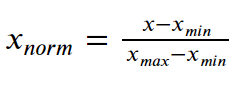

In [40]:
housing_num.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.582290,35.643149,28.608285,2642.004784,538.496851,1426.453004,499.986919,3.880754
std,2.005654,2.136665,12.602499,2174.646744,419.007096,1137.056380,380.967964,1.904294
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.810000,33.930000,18.000000,1454.000000,296.750000,789.000000,280.000000,2.566700
50%,-118.510000,34.260000,29.000000,2129.000000,437.000000,1167.000000,410.000000,3.545800
75%,-118.010000,37.720000,37.000000,3160.000000,647.000000,1726.000000,606.000000,4.773175
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


In [44]:
housing_num.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563


In [50]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
min_max_scaler.fit_transform(housing_num)

array([[0.72908367, 0.01702128, 0.62745098, ..., 0.06437961, 0.10228581,
        0.19032151],
       [0.61653386, 0.12978723, 0.94117647, ..., 0.0367443 , 0.12415721,
        0.22845202],
       [0.38545817, 0.22446809, 0.05882353, ..., 0.02556125, 0.05508962,
        0.25216204],
       ...,
       [0.59462151, 0.15744681, 0.68627451, ..., 0.04913254, 0.08649893,
        0.16789424],
       [0.23804781, 0.53510638, 0.2745098 , ..., 0.04972112, 0.09176122,
        0.35994676],
       [0.19223108, 0.55531915, 1.        , ..., 0.07332044, 0.20407828,
        0.14314285]])

***Standartizatsiya (StandardScaler)***

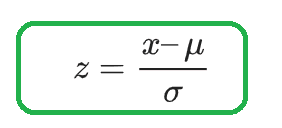

In [53]:
from sklearn.preprocessing import StandardScaler

standart_scaler = StandardScaler()
standart_scaler.fit_transform(housing_num)

array([[ 1.27258656, -1.3728112 ,  0.34849025, ...,  0.76827628,
         0.32290591, -0.326196  ],
       [ 0.70916212, -0.87669601,  1.61811813, ..., -0.09890135,
         0.6720272 , -0.03584338],
       [-0.44760309, -0.46014647, -1.95271028, ..., -0.44981806,
        -0.43046109,  0.14470145],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ...,  0.28983345,
         0.07090859, -0.49697313],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.30830275,
         0.15490769,  0.96545045],
       [-1.41489815,  0.99543676,  1.85617335, ...,  1.04883375,
         1.94776365, -0.68544764]])

havola : https://colab.research.google.com/github/MohirdevTexnik/MachineLearning_Noutbook/blob/main/05-ml-02-ML-preparation.ipynb

# **MLga tayyorgarlik. Pipeline. Sonlar**

Pipeline = konveyr